In [1]:
import pandas as pd
import numpy as np
import re
from time import time

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import precision_score, recall_score, f1_score, make_scorer,fbeta_score, average_precision_score

import matplotlib.pyplot as plt
import seaborn as sns

import nlp_utils as utils
from nlp_utils import get_vectorizer

pd.options.display.max_colwidth = 100

In [4]:
# Set up
text = "entities"
label = "SH"

class_names = ("Controls", "Self harm")

# Parameters of feature extraction
vectorizer_mode = "select features"
params = {'analyzer' : "word",
          'ngram_range' : (1,1),
          'use_idf' : True,
          'mode' : "select by pvalue",
          'thresh' : 0.001}

n_keywords = 20

In [3]:
df_train = pd.read_csv("./data/rmh_train.csv")
df_train.SH.value_counts()

0    307399
1      4145
Name: SH, dtype: int64

# Binary classification (excl. SI)

In [5]:
X = df_train[text]
y = df_train.SH.values

cv = StratifiedKFold(n_splits=10)

vectorizer = get_vectorizer(vectorizer_mode, params)

scores = {"precision" : [], 
          "recall" : [], 
          "f1" : [], 
          "f2" : [],
          "AP" : []
         }

for train_index, val_index in cv.split(X, y):
    vectorizer.fit(X[train_index], y[train_index])
    SH_keywords = vectorizer.df_features.sort_values(by="p_value")[:n_keywords].feature.tolist()
    
    y_pred = np.zeros_like(y[val_index])
    y_pred[X[val_index].str.contains("|".join(SH_keywords))] = 1
    y_proba = pd.get_dummies(y_pred, drop_first=False).values
    
    scores["precision"].append(precision_score(y[val_index], y_pred, average="binary"))
    scores["recall"].append(recall_score(y[val_index], y_pred, average="binary"))
    scores["f1"].append(f1_score(y[val_index], y_pred, average="binary"))
    scores["f2"].append(fbeta_score(y[val_index], y_pred, beta=2, average="binary"))
    scores["AP"].append(average_precision_score(y[val_index], y_proba[:,1]))
    
print("Average Precision: %0.3f (+/- %0.2f)" % (np.mean(scores["precision"]), 
                                                np.std(scores["precision"]) * 2))
print("Average Recall: %0.3f (+/- %0.2f)" % (np.mean(scores["recall"]), 
                                             np.std(scores["recall"]) * 2))
print("Average F1 score: %0.3f (+/- %0.2f)" % (np.mean(scores["f1"]), 
                                               np.std(scores["f1"]) * 2))
print("Average F2 score: %0.3f (+/- %0.2f)" % (np.mean(scores["f2"]), 
                                               np.std(scores["f2"]) * 2))
print("Average AP score: %0.3f (+/- %0.2f)" % (np.mean(scores["AP"]), 
                                               np.std(scores["AP"]) * 2))

Extracting features by a chi-squared test with p-value < 0.00...
Selected features: 1071

Extracting features by a chi-squared test with p-value < 0.00...
Selected features: 1073

Extracting features by a chi-squared test with p-value < 0.00...
Selected features: 1069

Extracting features by a chi-squared test with p-value < 0.00...
Selected features: 1055

Extracting features by a chi-squared test with p-value < 0.00...
Selected features: 1090

Extracting features by a chi-squared test with p-value < 0.00...
Selected features: 1072

Extracting features by a chi-squared test with p-value < 0.00...
Selected features: 1076

Extracting features by a chi-squared test with p-value < 0.00...
Selected features: 1062

Extracting features by a chi-squared test with p-value < 0.00...
Selected features: 1083

Extracting features by a chi-squared test with p-value < 0.00...
Selected features: 1061

Average Precision: 0.018 (+/- 0.00)
Average Recall: 0.946 (+/- 0.02)
Average F1 score: 0.035 (+/- 0.

In [6]:
SH_keywords

['x',
 'polypharmacy',
 'tablets',
 'self_inflicted',
 'polypharmacy_od',
 'tabs',
 'overdose',
 'attempt',
 'temazepam',
 'mg',
 'superficial_lacs',
 'suicidal_intent',
 'mg_diazepam',
 'self_harm',
 'seroquel',
 'intentional_od',
 'od',
 'mg_x',
 'intent',
 'intentional']

In [7]:
y_train = df_train.SH.values
vectorizer = get_vectorizer(vectorizer_mode, params)
vectorizer.fit(df_train[text], y_train)

Extracting features by a chi-squared test with p-value < 0.00...
Selected features: 1132



In [5]:
vectorizer.df_features

,feature,p_value,y
32,+ acid,9.562856e-04,1
50,+ aggressive,4.040876e-05,1
133,+ beers,7.998231e-06,1
171,+ bottle,8.208812e-20,1
172,+ bottles,1.024846e-12,1
...,...,...,...
310861,zolpidem mg,3.568205e-04,1
310873,zone hs,8.110904e-05,1
310891,zopiclone mg,8.374534e-25,1
310892,zopiclone x,1.394697e-37,1


In [6]:
SH_keywords = vectorizer.df_features.sort_values(by="p_value")[:n_keywords].feature.tolist()
SH_keywords

['polypharmacy od',
 'mg diazepam',
 'inflicted lac',
 'self harm',
 'intentional od',
 'taken x',
 'od x',
 'suicidal intent',
 'self inflicted',
 'mg x']

In [ ]:
[print('"' + word + '",') for word in SH_keywords]

In [9]:
vectorizer.df_features.sort_values(by="p_value")[:1335]

,feature,p_value,y
207262,polypharmacy od,0.000000e+00,1
162714,mg diazepam,0.000000e+00,1
134042,inflicted lac,0.000000e+00,1
242645,self harm,0.000000e+00,1
137831,intentional od,0.000000e+00,1
...,...,...,...
63020,day initally,5.537268e-13,1
128237,hypotensive desats,5.537268e-13,1
9459,aggressive hypotensive,5.537268e-13,1
162676,mg b/g,5.550606e-13,1


In [8]:
df_test = pd.read_csv("./data/rmh_test.csv")
y_test = df_test.SH.values

y_pred = np.zeros_like(y_test)
y_pred[df_test[text].str.contains("|".join(SH_keywords))] = 1
np.bincount(y_pred)

array([22671, 55215])

Model evaluation on the test set

Classification report:
              precision    recall  f1-score   support

           0      0.998     0.294     0.454     76850
           1      0.018     0.946     0.035      1036

    accuracy                          0.303     77886
   macro avg      0.508     0.620     0.245     77886
weighted avg      0.984     0.303     0.449     77886

binary F2: 0.083
Average precision score: 0.018


/projects/orygen/code/sh_env/lib64/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/projects/orygen/code/sh_env/lib64/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/projects/orygen/code/sh_env/lib64/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpret

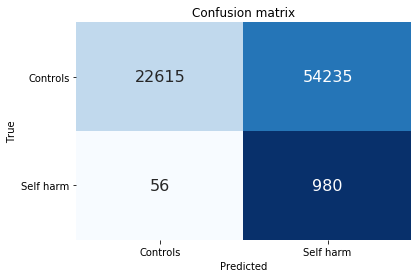

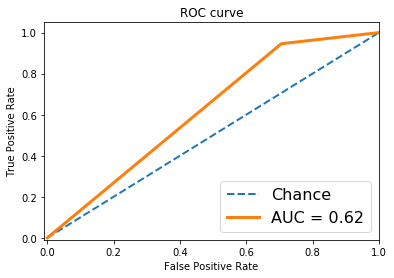

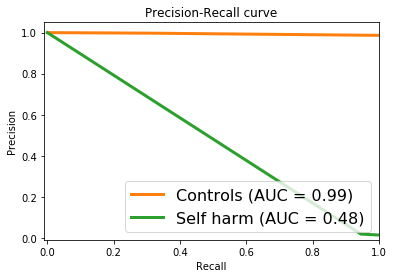

In [9]:
y_proba = pd.get_dummies(y_pred, drop_first=False).values
utils.evaluate_model(y_test, y_proba, class_names, "test", digits=3, save_figures=False)